<img src="https://thelogisticsworld.com/wp-content/uploads/2023/04/Mercado-Libre-2-1-828x548.jpg" alt="Imagen MeLi" width="30%"/>


# Data Science Challenge Model

En esta segunda parte del challenge se pide realizar un modelo, creando features que nos permita predecir la columna **sold_quantity** que hace referencia al total de ventas históricas de cierto producto. 

**Nota:** Dado que no se pudieron obtener los datos referente a la actualidad de México, estamos usando datos provisionales para poder hacer el ejercicio, estos datos son de mercado libre de Colombia y dado que estos datos no son actualizados, es decir, la creación de los items van desde 2014 a 2020, por ende estamos suponiendo que nos ubicamos en el tiempo el 22 de enero de 2021 para no meter ruido en los análisis temporales.

El objetivo inicial de este análisis es explorar y entender la distribución de las variables clave y preparar el dataset para un modelado más avanzado. Esta etapa es crucial para garantizar la calidad de los datos y proporcionar una base sólida para los análisis posteriores.

El conjunto de datos tiene 271,082 observaciones con 26 columnas entre las variables principales disponibles tenemos:

- **price**: Precio del producto.
- **available_quantity**: Cantidad disponible del producto.
- **sold_quantity**: Cantidad vendida (variable objetivo).
- **buying_mode**: Modo de compra (e.g., "buy_it_now").
- **listing_type_id**: Tipo de listado (e.g., "gold_special").
- **condition**: Condición del producto (e.g., "new").
- **accepts_mercadopago**: Si acepta MercadoPago.
- **original_price**: Precio original (si difiere del precio actual).
- **discount**: Descuento aplicado (si aplica).
- **free_shipping**: Si el envío es gratuito.
- **store_pickup**: Si está disponible la opción de recogida en tienda.
- **number_of_tags**: Número de etiquetas asignadas al producto.
- **is_official_store**: Si el producto proviene de una tienda oficial.
- **month_update**: Mes en que se actualizó el producto.
- **year_update**: Año en que se actualizó el producto.
- **year_created**: Año en que se creó el producto.
- **month_created**: Mes en que se creó el producto.
- **total_questions**: Número de preguntas totales que han hecho sobre el producto.
- **category_name**: Categoría del producto.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from adjustText import adjust_text


from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

import warnings
import os
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

/Users/danielrodriguez/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Read Data

In [2]:
# Cargar el archivo CSV
df = pd.read_csv('df_model_comb.csv')

## Análisis Exploratorio de datos

Queremos ver la estructura del conjunto de datos, su dimensión, valores nulos y tipo de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271082 entries, 0 to 271081
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   271082 non-null  object 
 1   title                271082 non-null  object 
 2   price                269707 non-null  float64
 3   available_quantity   271082 non-null  int64  
 4   sold_quantity        271082 non-null  int64  
 5   buying_mode          271082 non-null  object 
 6   listing_type_id      271082 non-null  object 
 7   condition            268382 non-null  object 
 8   accepts_mercadopago  271082 non-null  bool   
 9   original_price       8460 non-null    float64
 10  category_id          271082 non-null  object 
 11  seller_level_id      244487 non-null  object 
 12  seller_powerseller   197241 non-null  object 
 13  positive_rating      269565 non-null  float64
 14  negative_rating      269565 non-null  float64
 15  neutral_rating   

In [4]:
df.head()

,id,title,price,available_quantity,sold_quantity,buying_mode,listing_type_id,condition,accepts_mercadopago,original_price,category_id,seller_level_id,seller_powerseller,positive_rating,negative_rating,neutral_rating,free_shipping,store_pickup,number_of_tags,is_official_store,month_update,year_update,year_created,month_created,total_questions,category_name
0,MCO507883685,"Plumones Doble Punta Staedtler Twin-tip Pen, C...",47100.0,1,500,buy_it_now,gold_special,new,True,NaN,MCO172631,5_green,platinum,0.99,0.00,0.01,False,False,5,False,12,2020,2019.0,4.0,553.0,"Arte, Papelería y Mercería"
1,MCO513434416,Tablero Acrílico Blanco Borrable 120 X 80cm + ...,76900.0,500,500,buy_it_now,gold_pro,new,True,NaN,MCO168370,5_green,platinum,0.96,0.02,0.02,True,False,5,False,5,2019,2019.0,5.0,722.0,"Arte, Papelería y Mercería"
2,MCO570929580,Crayola Marcador Lavable Super Tips 100 Unidad...,120000.0,1,150,buy_it_now,gold_special,new,True,NaN,MCO172631,5_green,platinum,0.96,0.02,0.02,True,False,4,False,7,2020,2020.0,7.0,74.0,"Arte, Papelería y Mercería"
3,MCO499057490,Papel Fotográfico Adhesivo Brillante Autoadhes...,16800.0,1,500,buy_it_now,gold_pro,new,True,NaN,MCO416637,5_green,platinum,0.99,0.00,0.01,False,False,7,False,7,2020,2018.0,12.0,293.0,"Arte, Papelería y Mercería"
4,MCO539332669,Colores Prismacolor Junior Redondos Caja X48 P...,60900.0,50,200,buy_it_now,gold_special,new,True,NaN,MCO172626,5_green,platinum,0.95,0.03,0.02,False,False,6,True,9,2020,2019.0,11.0,28.0,"Arte, Papelería y Mercería"


El dataset contiene 271,082 registros y 26 columnas. Aquí hay algunas observaciones iniciales:

Columnas Relevantes:

- **id**: Identificador único de la publicación.
- **title**: Título del producto.
- **price**: Precio del producto.
- **available_quantity**: Cantidad disponible de productos.
- **sold_quantity**: La variable objetivo que queremos predecir (cantidad vendida).
- **buying_mode**, **listing_type_id**, **condition**: Atributos relacionados con la publicación y las características del producto.
- **accepts_mercadopago**, **free_shipping**, **store_pickup**, **is_official_store**: Atributos booleanos que podrían influir en las ventas.
- **seller_level_id**, **seller_powerseller**, **positive_rating**, **negative_rating**, **neutral_rating**: Información relacionada con el vendedor.
- **year_created**, **month_created**, **year_update**, **month_update**: Fechas relacionadas con la creación y actualización de la publicación.
- **total_questions**: Cantidad de preguntas recibidas, lo cual podría ser un indicativo del interés en el producto.

Valores Nulos:

- Algunas columnas como **original_price**, **seller_level_id**, **year_created**, y **total_questions** tienen valores nulos que necesitarán tratamiento.

Tipos de Datos:

- Algunas columnas como **month_update** y **year_update** están en formato de texto y es posible que necesiten conversión a numérico para el modelado.

## Preprocesamiento de datos 

In [5]:
# Limpieza de datos
# 1. Tratar valores nulos

# Remover columnas que tienen demasiados valores nulos o que no parecen ser relevantes
df_cleaned = df.drop(columns=['original_price', 'seller_powerseller'])

# Imputar valores nulos con estrategias básicas
df_cleaned['seller_level_id'].fillna('unknown', inplace=True)
df_cleaned['year_created'].fillna(df_cleaned['year_created'].median(), inplace=True)
df_cleaned['month_created'].fillna(df_cleaned['month_created'].median(), inplace=True)
df_cleaned['total_questions'].fillna(0, inplace=True)

# 2. Conversión de tipos de datos

# Convertir columnas relacionadas con fechas a tipo numérico
df_cleaned['month_update'] = pd.to_numeric(df_cleaned['month_update'], errors='coerce')
df_cleaned['year_update'] = pd.to_numeric(df_cleaned['year_update'], errors='coerce')

# Verificar si aún quedan valores nulos
null_values = df_cleaned.isnull().sum()

# Análisis exploratorio de datos (EDA)
# Descripción básica de las columnas numéricas
description = df_cleaned.describe()



1. Limpieza de Datos:
    - Se eliminaron las columnas con demasiados valores nulos o irrelevantes (original_price, seller_powerseller).
    - Las columnas seller_level_id, year_created, month_created y total_questions fueron imputadas o corregidas para manejar los valores nulos.
    - Las columnas relacionadas con fechas (month_update, year_update) se convirtieron a datos numéricos.
    
2. Valores Nulos Restantes:
    - Aún hay algunos valores nulos en las columnas 
        - **price**, 
        - **condition**, 
        - **positive_rating**, 
        - **negative_rating**, 
        - **neutral_rating**, 
        - **month_update** y 
        - **year_update**. 
      
      Estos valores deberán ser manejados dependiendo de cómo influencien el modelado.
3. Descripción de Variables Numéricas:
    - **price** tiene una alta desviación estándar, lo que indica la presencia de valores extremos.
    - **sold_quantity** varía significativamente, con una gran cantidad de publicaciones con pocas ventas y algunas con un número muy alto de ventas.
    


In [8]:
# Imputación de valores nulos restantes

# Imputar valores nulos en 'price' con la mediana
df_cleaned['price'].fillna(df_cleaned['price'].median(), inplace=True)

# Imputar valores nulos en 'condition' con el valor más frecuente
df_cleaned['condition'].fillna(df_cleaned['condition'].mode()[0], inplace=True)

# Imputar valores nulos en 'positive_rating', 'negative_rating', y 'neutral_rating' con la mediana
df_cleaned['positive_rating'].fillna(df_cleaned['positive_rating'].median(), inplace=True)
df_cleaned['negative_rating'].fillna(df_cleaned['negative_rating'].median(), inplace=True)
df_cleaned['neutral_rating'].fillna(df_cleaned['neutral_rating'].median(), inplace=True)

# Imputar valores nulos en 'month_update' y 'year_update' con la mediana
df_cleaned['month_update'].fillna(df_cleaned['month_update'].median(), inplace=True)
df_cleaned['year_update'].fillna(df_cleaned['year_update'].median(), inplace=True)

# Verificar si quedan valores nulos
null_values_after_imputation = df_cleaned.isnull().sum()

null_values_after_imputation


id                     0
title                  0
price                  0
available_quantity     0
sold_quantity          0
buying_mode            0
listing_type_id        0
condition              0
accepts_mercadopago    0
category_id            0
seller_level_id        0
positive_rating        0
negative_rating        0
neutral_rating         0
free_shipping          0
store_pickup           0
number_of_tags         0
is_official_store      0
month_update           0
year_update            0
year_created           0
month_created          0
total_questions        0
category_name          0
dtype: int64

Todos los valores nulos de las columnas restantes han sido imputados, ahora procederemos a crear un baseline model

## Creación y selección de mejores features 

Dado que tenemos muchas variables, es posible que el entrenamiento del modelo sea tardado, para reducir el tiempo de entrenamiento, haremos un análisis para seleccionar las mejores features para el modelado.

De inicio podemos considerar la creación de nuevas features que podrían captar mejor la relación entre las variables y la cantidad vendida (sold_quantity). 

Posibles features adicionales:
- **Precio relativo**: Feature que represente el precio en relación al promedio de precios en la misma categoría (price_relative_to_category_avg).
- **Ratio de ventas**: Crear un ratio entre **sold_quantity** y **available_quantity** (**sales_ratio**), que podría indicar la demanda relativa de un producto.
- **Interacción entre variables**: Crear características de interacción como **price** * **positive_rating** o **available_quantity** * **free_shipping** para capturar efectos combinados entre variables.
- **Tiempo desde la última actualización**: Crear una característica que represente el tiempo transcurrido desde la última actualización (**time_since_last_update**), calculado a partir de **year_update** y **month_update**.
- **Edad de la publicación**: Crear una característica que mida la antigüedad de la publicación (**publication_age**), calculada a partir de **year_created** y **month_created**.
- **Popularidad de la categoría**: Agregar una característica que represente la popularidad de la categoría, basada en el número total de ventas de productos en esa categoría.
- **Interacción con preguntas**: Crear características adicionales relacionadas con las preguntas recibidas (**total_questions**), como el ratio de preguntas por venta.



In [9]:
# Crear nuevas características
df_cleaned['price_relative_to_category_avg'] = df_cleaned.groupby('category_id')['price'].transform(lambda x: x / x.mean())
df_cleaned['price_positive_rating'] = df_cleaned['price'] * df_cleaned['positive_rating']
df_cleaned['time_since_last_update'] = (2021 - df_cleaned['year_update']) * 12 + (8 - df_cleaned['month_update'])
df_cleaned['publication_age'] = (2021 - df_cleaned['year_created']) * 12 + (8 - df_cleaned['month_created'])
df_cleaned['category_popularity'] = df_cleaned.groupby('category_id')['sold_quantity'].transform('sum')

df_cleaned['log_price'] = np.log1p(df_cleaned['price'])
df_cleaned['log_total_questions'] = np.log1p(df_cleaned['total_questions'])

# Interacciones entre variables
df_cleaned['price_quantity_interaction'] = df_cleaned['price'] * df_cleaned['available_quantity']
df_cleaned['questions_tags_interaction'] = df_cleaned['total_questions'] * df_cleaned['number_of_tags']

# Codificación de variables categóricas
df_cleaned['condition_encoded'] = df_cleaned['condition'].factorize()[0]
df_cleaned['listing_type_encoded'] = df_cleaned['listing_type_id'].factorize()[0]
df_cleaned['buying_mode_encoded'] = df_cleaned['buying_mode'].factorize()[0]

In [10]:
# Calcular la matriz de correlación
correlation_matrix = df_cleaned.corr()

# Extraer las correlaciones de 'sold_quantity' con otras variables
correlation_with_target = correlation_matrix['sold_quantity'].sort_values(ascending=False)

# Mostrar las variables con mayor correlación con 'sold_quantity'
correlation_with_target


sold_quantity                     1.000000
questions_tags_interaction        0.521159
total_questions                   0.479210
log_total_questions               0.414336
publication_age                   0.251341
number_of_tags                    0.181302
category_popularity               0.111771
accepts_mercadopago               0.079903
positive_rating                   0.077987
available_quantity                0.039565
time_since_last_update            0.029416
negative_rating                   0.001304
is_official_store                 0.000556
store_pickup                     -0.002949
price_positive_rating            -0.007235
price_quantity_interaction       -0.009584
neutral_rating                   -0.011438
year_update                      -0.018481
price                            -0.025762
price_relative_to_category_avg   -0.032064
month_update                     -0.040895
listing_type_encoded             -0.043203
free_shipping                    -0.044385
buying_mode

- **sold_quantity** muestra una correlación positiva notable con **total_questions** (0.47), lo que sugiere que el interés del cliente (medido por preguntas) puede ser un fuerte predictor de ventas.
- Hay una correlación negativa moderada entre **sold_quantity** y **year_created** (-0.23), lo que podría indicar que publicaciones más antiguas tienden a vender menos.

Veamos como es la distribución de sold_quantity

In [11]:
sorted(df_cleaned.sold_quantity.unique())

[0, 1, 2, 3, 4, 5, 25, 50, 100, 150, 200, 250, 500, 5000]

In [12]:
df_cleaned.sold_quantity.describe()

count    271082.000000
mean         30.851964
std         116.727801
min           0.000000
25%           1.000000
50%           5.000000
75%          25.000000
max        5000.000000
Name: sold_quantity, dtype: float64

In [13]:
df_cleaned.sold_quantity.value_counts()

5       79450
0       51855
1       28019
25      27625
50      20590
2       16096
3       11504
4        9616
100      8706
250      5892
150      4597
500      4119
200      2926
5000       87
Name: sold_quantity, dtype: int64

Con base en la distribución de la variable sold_quantity, observamos que los valores están altamente concentrados en ciertas clases, especialmente en las cantidades bajas (5, 0, 1, 25, etc.), mientras que los valores más altos (5000, 500, 250) son mucho menos frecuentes.

Análisis de la Distribución:
Clases Dominantes:
Los valores más comunes son 5, 0, 1, 25, 50, que abarcan una gran parte del total. Estas clases representan eventos de ventas más frecuentes.
Clases Raras:
Valores como 5000 y 500 son extremadamente raros, con solo 87 y 4119 instancias, respectivamente. Estos valores representan eventos de ventas excepcionales.

Dado que la variable objetivo (sold_quantity) tiene un conjunto de valores discretos, que incluyen tanto valores pequeños como valores muy grandes, puedes considerar varios enfoques alternativos para predecirla como la clasificacion multiclase que en lugar de tratar el problema como una regresión, podrías abordarlo como un problema de clasificación donde cada valor posible de sold_quantity es una clase diferente. Este enfoque parece más adecuado dado el carácter discreto y la distribución desigual de los valores. Usaremos un modelo de clasificación con técnicas para manejar el desbalance de clases, como Random Forest o XGBoost, puede ofrecer buenos resultados.


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     10422
           1       0.48      0.50      0.49      5539
           2       0.25      0.14      0.18      3280
           3       0.24      0.09      0.13      2349
           4       0.27      0.08      0.12      1976
           5       0.58      0.82      0.68     15687
          25       0.45      0.31      0.37      5487
          50       0.42      0.46      0.44      4153
         100       0.44      0.27      0.34      1784
         150       0.50      0.23      0.31       893
         200       0.60      0.22      0.32       612
         250       0.42      0.50      0.46      1176
         500       0.67      0.71      0.69       843
        5000       0.89      0.50      0.64        16

    accuracy                           0.57     54217
   macro avg       0.50      0.41      0.43     54217
weighted avg       0.54      0.57      0.54     54217



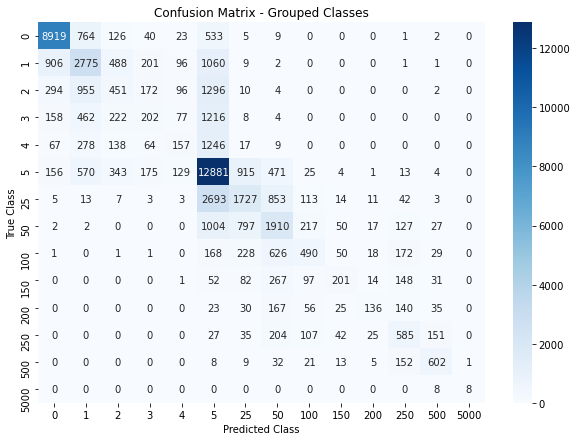

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Preparar las características (X) y la variable objetivo (y)
features = ["questions_tags_interaction",
"category_popularity",
"log_price",
"price_relative_to_category_avg",
"price_quantity_interaction",
"publication_age",
"price_positive_rating",
"log_total_questions"]

X = df_cleaned[features]
y = df_cleaned['sold_quantity']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Random Forest para clasificación multiclase
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Evaluar el rendimiento del modelo
classification_report_str = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(classification_report_str)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Grouped Classes')
plt.show()

Se ve que hay una confusión entre clases. Por ejemplo en la clase 2 se confunde con 1 o 5, y clase 3 con 2 y 5.
El modelo clasifica correctamente la clase 5, lo cual es entendible dado que es la clase mas frecuente
Para la clase 5000 solo con 16 observaciones en el set de pruebas, el modelo clasifica correctamente 8. Esto es predecible dado que es la clase de menor frecuencia.

Dado lo anterior se propone una agrupación de las clases, buscando simplificar el modelo y se espera mejore el desempeño del modelo 

La propuesta de agrupación es: 
- Grupo 1: Ventas_bajas (0-5), combinar las clases 0, 1, 2, 3, 4 y 5 y como esto representan los valores de ventas bajos y son frecuentemente confundidos por el modelo 
- Grupo 2: Ventas_medias (25-100) combinar las clases 25, 50 y 100 representando los volumenes medios de ventas.
- Grupo 3: Ventas altas (150-500) combinar las clases 150, 200, 250 y 500 representando los volumenes de ventas altas.
- Grupo 4: Ventas_muy_altas (5000) mantener la clase 5000 separada, dado que representa valores atipicos.

                 precision    recall  f1-score   support

     high_sales       0.79      0.68      0.73      3524
      low_sales       0.92      0.95      0.94     39253
   medium_sales       0.72      0.69      0.70     11424
very_high_sales       0.80      0.50      0.62        16

       accuracy                           0.88     54217
      macro avg       0.81      0.70      0.75     54217
   weighted avg       0.87      0.88      0.87     54217



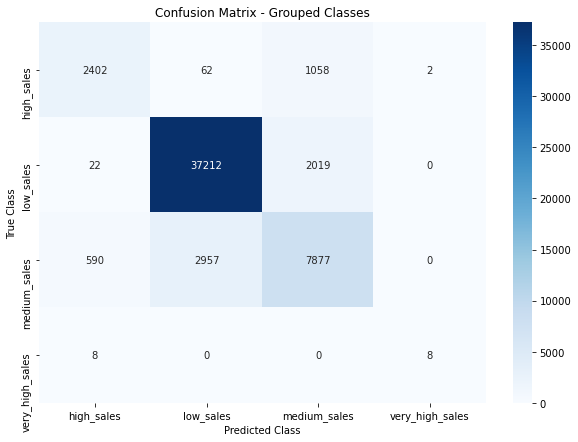

In [20]:
# Define the class grouping function
def group_classes(sold_quantity):
    if sold_quantity in [0, 1, 2, 3, 4, 5]:
        return 'low_sales'
    elif sold_quantity in [25, 50, 100]:
        return 'medium_sales'
    elif sold_quantity in [150, 200, 250, 500]:
        return 'high_sales'
    elif sold_quantity == 5000:
        return 'very_high_sales'

# Apply the grouping to the target variable
df_cleaned['sold_quantity_grouped'] = df_cleaned['sold_quantity'].apply(group_classes)

# Prepare the features (X) and the new target variable (y)
X = df_cleaned[features]
y = df_cleaned['sold_quantity_grouped']

# Divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a new Random Forest model with the grouped classes
rf_classifier_grouped = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_classifier_grouped.fit(X_train, y_train)

# Make predictions on the test set
y_pred_grouped = rf_classifier_grouped.predict(X_test)

# Evaluate the performance of the new model
classification_report_grouped = classification_report(y_test, y_pred_grouped)
conf_matrix_grouped = confusion_matrix(y_test, y_pred_grouped)

print(classification_report_grouped)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_grouped, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix - Grouped Classes')
plt.show()

### Probar otro modelo como xgboost

[01:07:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Reporte de Clasificación - XGBoost con Clases Agrupadas
                 precision    recall  f1-score   support

     high_sales       0.77      0.64      0.70      3524
      low_sales       0.92      0.94      0.93     39253
   medium_sales       0.70      0.68      0.69     11424
very_high_sales       0.80      0.50      0.62        16

       accuracy                           0.87     54217
      macro avg       0.80      0.69      0.74     54217
   weighted avg       0.87      0.87      0.87     54217



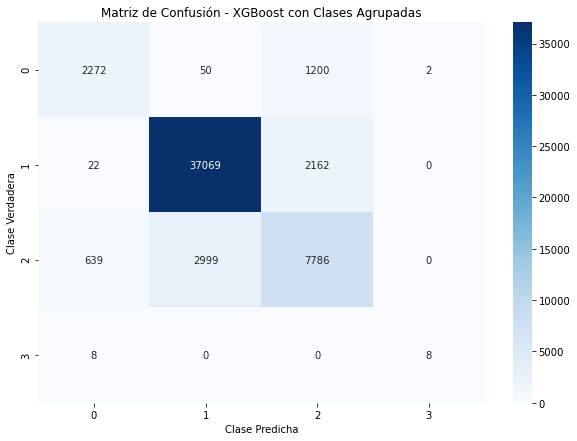

In [23]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el modelo XGBoost con parámetros básicos
xgb_clf_grouped = xgb.XGBClassifier(objective='multi:softprob', random_state=42)

# Entrenar el modelo XGBoost con las clases agrupadas
xgb_clf_grouped.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_grouped_xgb = xgb_clf_grouped.predict(X_test)

# Evaluar el rendimiento del modelo XGBoost con clases agrupadas
classification_report_grouped_xgb = classification_report(y_test, y_pred_grouped_xgb)
conf_matrix_grouped_xgb = confusion_matrix(y_test, y_pred_grouped_xgb)

print("Reporte de Clasificación - XGBoost con Clases Agrupadas")
print(classification_report_grouped_xgb)

# Graficar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_grouped_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión - XGBoost con Clases Agrupadas')
plt.show()

Tomando en cuenta que el modelo de Random Forest se desempeña mejor que el de Xgboost, nos quedamos con ese por el momento, destacando lo siguiente:
    
   Interpretación de los Resultados:
- Exactitud General (88%): El modelo ha alcanzado una alta exactitud general, lo que significa que el 88% de las predicciones coinciden con las etiquetas reales en el conjunto de prueba.

    Desempeño por Clase:
- Bajas Ventas (0-5):Precisión: 0.92, Recall: 0.95, F1-Score: 0.94
El modelo tiene un desempeño excepcional en esta clase, lo cual es esperable dado que contiene la mayoría de las observaciones.
- Ventas Medias (25-100):Precisión: 0.72, Recall: 0.69, F1-Score: 0.70
El desempeño es decente, pero menor que en las bajas ventas. Un recall de 0.69 indica que el modelo no detecta aproximadamente el 31% de las instancias de ventas medias.
- Altas Ventas (150-500): Precisión: 0.79, Recall: 0.68, F1-Score: 0.73
El desempeño es ligeramente mejor que en ventas medias, pero el recall indica que el modelo no detecta aproximadamente el 32% de las instancias.
- Ventas Muy Altas (5000):Precisión: 0.80, Recall: 0.50, F1-Score: 0.62
Esta clase es muy pequeña, con solo 16 instancias. El modelo tiene un desempeño razonable, pero solo identifica correctamente la mitad de estas instancias.

    Matriz de Confusión:
La matriz de confusión muestra dónde el modelo está cometiendo errores:
Altas Ventas Clasificadas como Bajas Ventas: Algunas instancias de altas ventas (150-500) se están clasificando incorrectamente como bajas ventas (0-5), lo cual podría ser problemático dependiendo del caso de uso.
Ventas Medias Confundidas con Bajas Ventas: También hay instancias donde las ventas medias se clasifican incorrectamente como bajas ventas, aunque esto es menos severo.

    Fortalezas:
- Alta Exactitud: El modelo es altamente preciso en general, con un desempeño particularmente fuerte en la predicción de bajas ventas, que es la clase más frecuente.
- Desempeño Balanceado: El modelo en general tiene un buen desempeño en los diferentes grupos, con una precisión y recall razonables para cada uno.

    Limitaciones:
- Impacto de la Agrupación: La agrupación de clases en bajas ventas, ventas medias, altas ventas, y ventas muy altas se realizó para simplificar el problema y mejorar el desempeño del modelo. Sin embargo, esto significa que pueden ocurrir errores dentro de estos grupos.
- Posibles Clasificaciones Erróneas: Una predicción de altas ventas (150-500) podría incluir instancias donde las ventas reales fueron más cercanas a 150 o 500, lo cual podría llevar a decisiones comerciales diferentes. El impacto de este posible error debe considerarse en la toma de decisiones.
- Casos Especiales: El modelo tiene un desempeño un poco más limitado con la clase rara ventas muy altas, lo cual debería manejarse con cuidado. Dado el pequeño número de instancias, estas predicciones podrían requerir validación adicional.

    Cómo Manejar los Errores:
- Umbrales de Confianza: Sugiere la posibilidad de utilizar intervalos de confianza o umbrales de probabilidad para determinar qué tan seguro está el modelo en sus predicciones. Por ejemplo, si una predicción para altas ventas tiene baja confianza, podría marcarse para una revisión adicional.
- Reglas de Negocio: Implementa lógica adicional de negocio para manejar las predicciones que caen en categorías con rangos amplios, asegurando que las decisiones basadas en estas predicciones sean robustas frente a posibles variaciones dentro del grupo.
- Intervención Humana: Para decisiones críticas, especialmente aquellas que involucren predicciones en las categorías altas ventas y ventas muy altas, considera que un humano revise las predicciones del modelo antes de tomar decisiones finales.

    Conclusión:
En general, el modelo está funcionando bien, pero se debe estar conscientes del posible impacto de la agrupación de clases en las predicciones. Estableciendo reglas de negocio apropiadas y monitoreando el desempeño del modelo, se puede mitigar el impacto de cualquier error, especialmente aquellos que ocurren al predecir categorías amplias como altas ventas. Este enfoque ayudará a garantizar que las predicciones del modelo respalden una toma de decisiones efectiva e informada.

### Next steps


- Hacer fine tuning para los modelos y ver cual va mejor.
- Probar con otro tipo de interacciones o caracteristicas polinomiales para capturar relaciones mas complejas no lineales.
- Clustering: Agrupar observaciones similares, permitiendo al modelo hacer mejores predicciones para cada grupo.
- Si se tuvieran datos temporales estaría genial integrarlos y ver los efectos, dada la estacionalidad, temporada o tendencia de ciertos grupos de productos.
- Probar haciendo el modelo con los valores reales de sold_quantity usando regresores y comparar con el modelo de clasificación.